# Lab 13: Least Squares Methods

In [1]:
#import needed libraries
import numpy as np
from numpy.linalg import lstsq
from scipy.optimize import curve_fit
import scipy.linalg as la
import matplotlib.pyplot as plt

### Activity 1: Ordinary Least Squares Analysis with Hooke's Law

Suppose we have an experiment measuring the spring constant similar to the example in class. We want to determine the spring constant $k$ given a set of force ($F_{sp}$) and displacement ($\delta x$) measurements. Recall that Hooke's law tells us that these are related via:
$$
F_{sp}= - k \Delta x
$$
which is clearly a linear relationship, and ordinary (or linear) least squares is appropriate. 

We will start by generating some simulated experimental data - note we could use real measurments here, but for simplicity we will generate simulated data with some noise, which will allow us later to adjust noise amplitude on the 'fly' so we can examine how that impacts the process. 

In [2]:
# generate 'Experimental Data'

#crate list of x values to consider
x = np.linspace(0, 4, 201)

#specify spring constant
k = 10

#specify the noise amplitude - can be adjusted as desired
noise_amp = 3

#create the 'y' data using Hooke's Law and adding a noise term using a random number generator
Fspring = k*x + x * np.random.random(len(x))*noise_amp 

Plot the data we just created and ensure it appears as expected

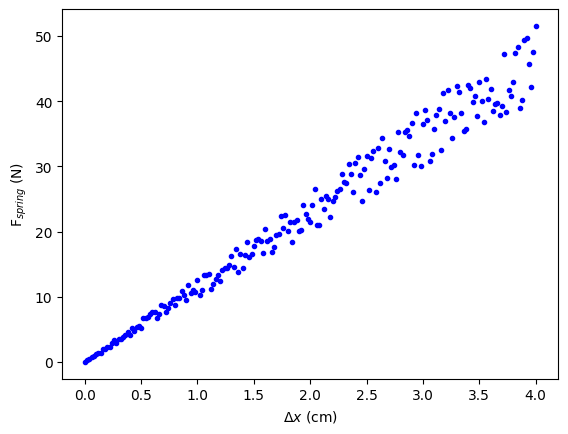

In [3]:
plt.figure()

plt.plot(x, Fspring, 'b.')

plt.ylabel(r'F$_{spring}$ (N)')
plt.xlabel(r'$\Delta x$ (cm)')

plt.show()

Let's perform ordinary least squares as a linar algebra problem. Recall that for a fitted model in linear least squares we assume a function $f(x,\alpha_i) = \alpha_1*x + \alpha_0$. The alpha parameters form a column vector $\alpha$ which can be found by solving:
$$
(X^TX)^{-1}X^T Y = \alpha
$$

In [8]:
#start by constructing the necissary matricies

# assemble matrix X from our x data points
X = np.vstack([x, np.ones(len(x))]).T

# Create Y as a column vector of the spring force values
Y = Fspring[:, np.newaxis]

In [13]:
#now do the matrix multiplication to solve for \alpha

alpha = np.linalg.inv(X.T@X)@X.T@Y
print('The optimized parameters are: ', alpha.T[0])

The optimized parameters are:  [11.5286396   0.05077834]


Take a moment to calculate the percent difference with respect to 'k', given that we know the 'true' value from earlier

In [26]:
### ADD YOUR CODE HERE ###
pct_error = 100*(alpha[0][0] - k) / k 
print(f"Percent error is {pct_error:3f}")


Percent error is 15.286396


At the start of the notebook, we imported the `numpy.linalg` package with `lstsq` function. Try implementing it below to verify that our answer agrees. 

In [ ]:
### ADD YOUR CODE HERE ###
sol = lstsq(X, Y)
params = sol[0]

k_found = params[0][0]
b_found = params[1][0]

Finally, let's plot the result with our original data to see that the agreement witht the fitted curve is good. 

<Figure size 640x480 with 0 Axes>

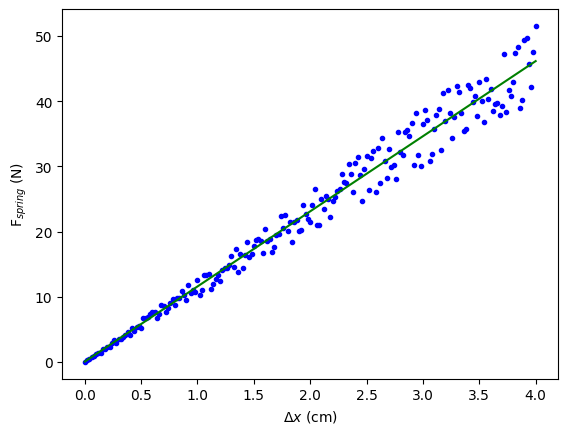

In [51]:
plt.figure()

### ADD YOUR CODE BELOW ###
plt.figure()

plt.plot(x, Fspring, 'b.')
plt.plot(x, k_found * x + b_found, color='green')

plt.ylabel(r'F$_{spring}$ (N)')
plt.xlabel(r'$\Delta x$ (cm)')

plt.show()

To complete this lab activity, try repeating the above cells (starting from the top) with different values of the noise amplitude parameter. Take a few moments to study how this impacts the percent error calculation with a few 'test runs'. 

# Activity 2: Non-Linear Least Squares

Suppose we have a set of data that visually seems to follow an exponential decay form, and we want to fit the function $f(t)=\alpha_0 e^{\alpha_1 t}$ to determine the parameters $\alpha_i$. 
Let's look at a solution using the Gauss-Newton method.

Start by define a simple data set to be fit

In [52]:
# Example Data
t = np.array([0.0, 1.0, 2.0, 3.0])
y = np.array([2.0, 0.7, 0.3, 0.1])

Next, we need to define a few functions to make this proces easier, including the residual ($r$), and the Jacobian ($J$) for this functional form. 

In [53]:
def residual(x):
    return y - x[0] * np.exp(x[1] * t)

def jacobian(x):
    return np.array([ -np.exp(x[1] * t), -x[0] * t * np.exp(x[1] * t)]).T

We'll also want to look at our progress during the iteration. The function below will be handy in examining the results. 

In [54]:
def plot_guess(x,plot_cutoff=1E5):
    norm2= la.norm(residual(x), 2)
    print("Residual norm:", norm2)
    
    if norm2<=plot_cutoff:
        plt.plot(t, y, 'ro', markersize=8, clip_on=False)
        T = np.linspace(t.min(), t.max(), 100)
        Y = x[0] * np.exp(x[1] * T)
        plt.plot(T, Y, 'b-')
        plt.ylabel('y')
        plt.xlabel('x')

Now let's examine the fitting. Recall that we must start with an intial guess for this method.

Residual norm: 162.72704101675862


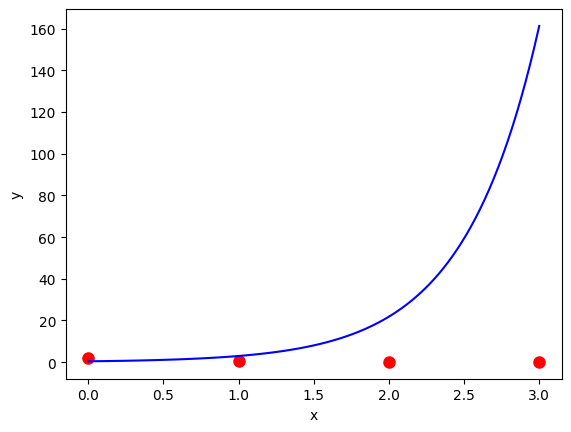

In [55]:
#an initial guess to start with
x = np.array([0.4, 2])  # array with alpha_0 and alpha_1

#plot
plt.figure()
plot_guess(x)

Not a very satisfying result to start with, but that's why we need to iterate! Try using iteration on this process by updating our parameters each time following the form:
$$
\alpha^{k+1} = \alpha^k - (J^TJ)^{-1}J^T r(\alpha^k)
$$
To perform this calculation more efficiently, let's take advantage of the fact that $(J^TJ)^{-1}J^T$ is the psuedo-inverse of $J$. 

Residual norm: 11.463610412114111
Residual norm: 4.593133565552821
Residual norm: 2.1360711524228404
Residual norm: 1.5390038077925423
Residual norm: 1595.362194010822


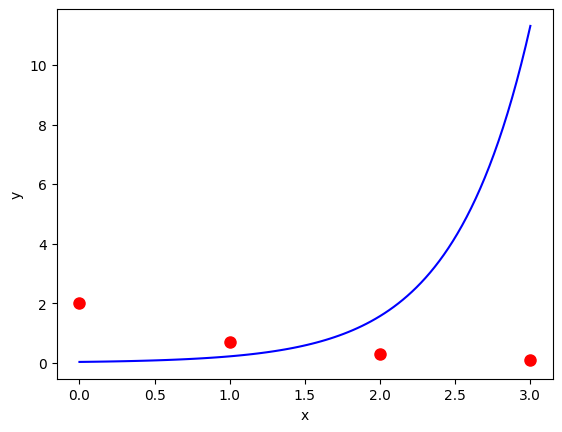

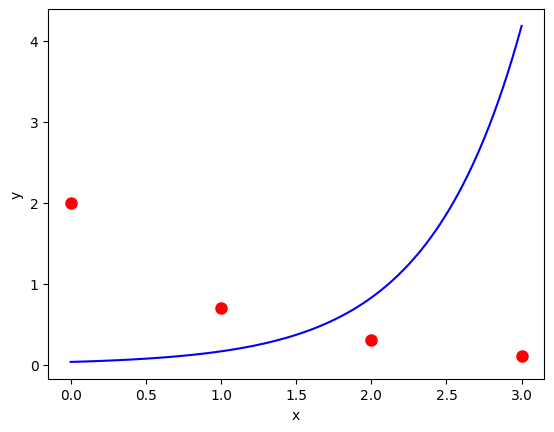

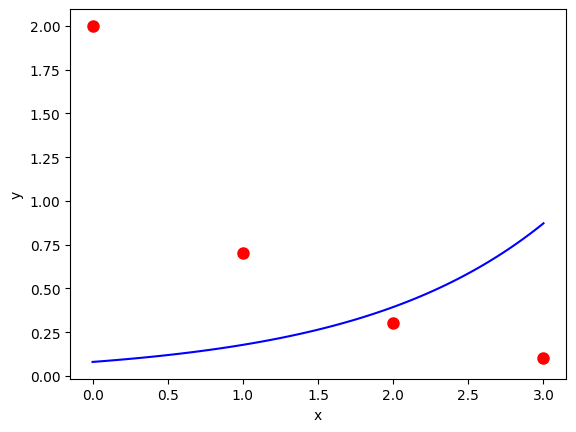

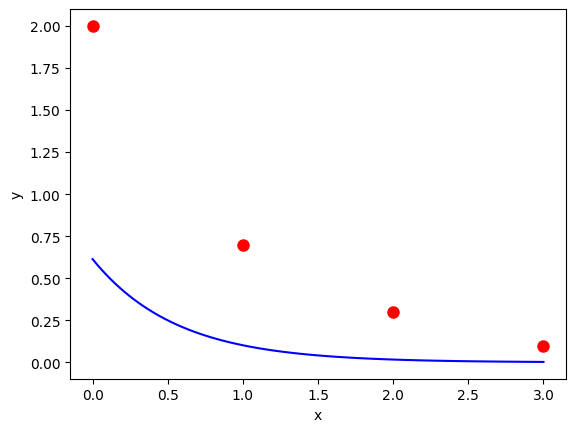

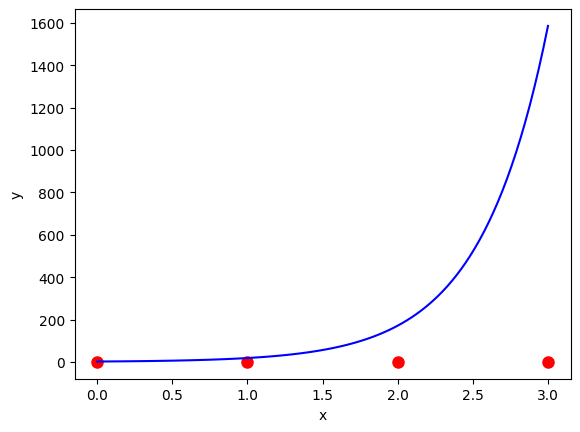

In [56]:
#set number of iterations to perform
iterations = 5

#execute iteration as a for loop so we can plot each iteration as we go
for i in range(iterations):

    #update parameters
    x = x + np.linalg.pinv(jacobian(x))@-residual(x)

    #plot
    plt.figure()
    plot_guess(x)

Note the above can get quite messy for many iterations showing the plot each time. We can use the 'plot_cutoff' argument in the function to only show 'good' fits (say residual norms<1). Now we can iterate many times and check for convergence.

Residual norm: 11.463610412114173
Residual norm: 4.5931335655528445
Residual norm: 2.136071152422857
Residual norm: 1.5390038077925627
Residual norm: 1595.362194008662
Residual norm: 13.637816911752612
Residual norm: 5.347397014253105
Residual norm: 2.3037449572137567
Residual norm: 1.8416002469901185
Residual norm: 66.5199133658947
Residual norm: 7.903602627866984
Residual norm: 3.2889696870986995
Residual norm: 1.4379898673505818
Residual norm: 0.2718935615406703
Residual norm: 0.04487612316560828
Residual norm: 0.044677612377253595
Residual norm: 0.04467753304126531
Residual norm: 0.04467753298723406
Residual norm: 0.04467753298719709
Residual norm: 0.04467753298719699


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

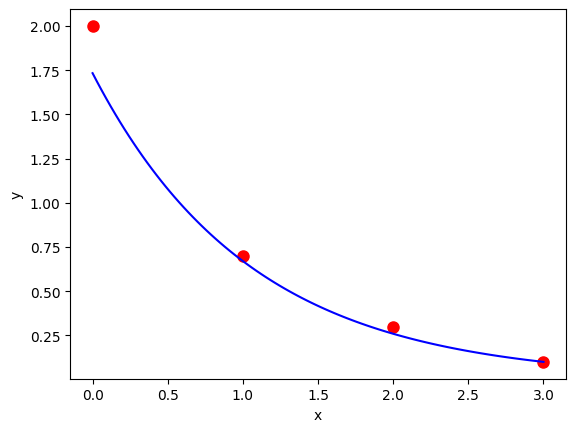

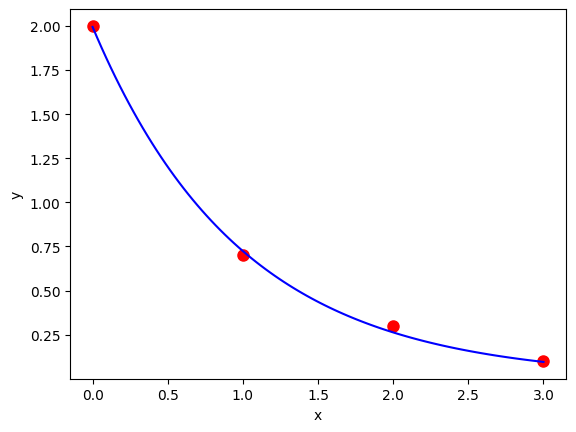

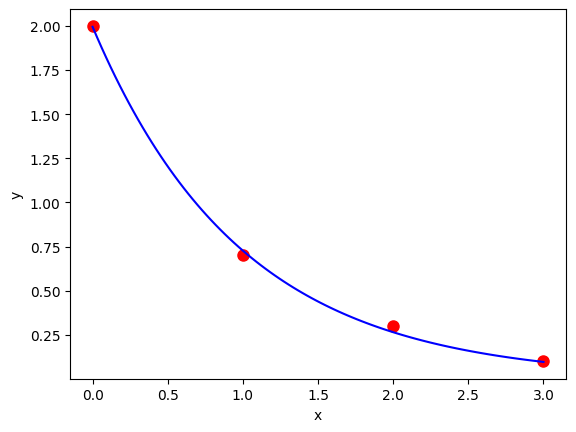

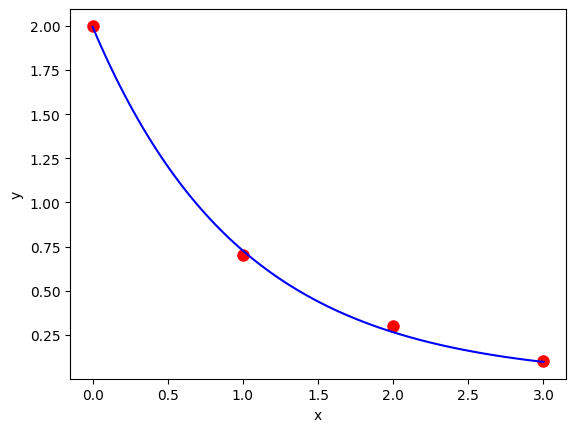

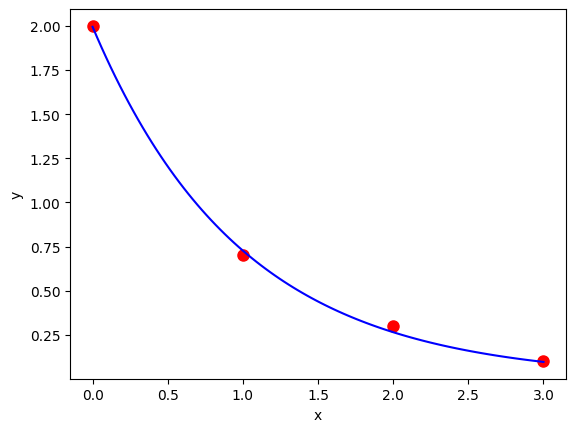

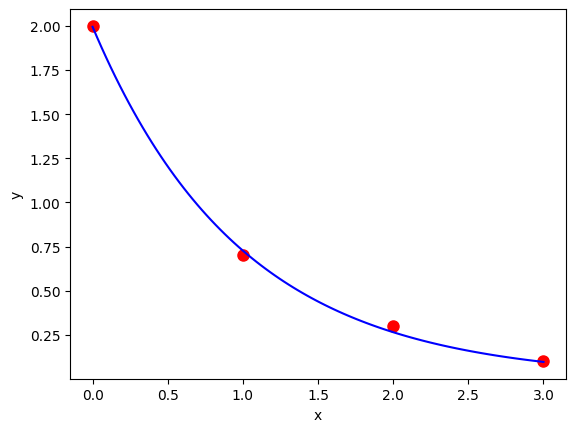

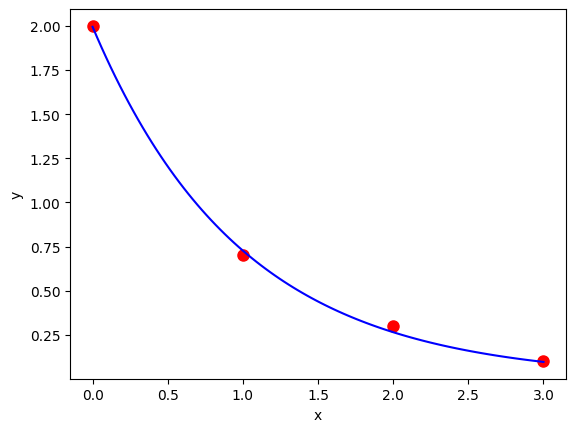

In [58]:
#initial guess to start with
x = np.array([0.4, 2])

#set number of iterations
iterations = 20

#execute
for i in range(iterations):

    # update parameters
    x = x + la.lstsq(jacobian(x), -residual(x))[0]

    #plot
    plt.figure()
    plot_guess(x,plot_cutoff=0.3) #use extra option here to not plot fits unless they are relativly good 

Notice the last few values of the residual norm indicate that we are converging to a solution. That said, it might be useful to have an implementation that stops early if the change in fitted solution one iteration to the next becomes less than 1%. Take a moment to think about this, and try implementing below. 

In [81]:
### ADD YOUR CODE HERE ###
#initial guess to start with
x = np.array([0.4, 2])

#set number of iterations
iterations = 20

residual_norm_ls = np.array([])
#execute
for i in range(iterations):

    # update parameters
    x = x + la.lstsq(jacobian(x), -residual(x))[0]

    norm2= la.norm(residual(x), 2)
    residual_norm_ls = np.append(residual_norm_ls, norm2)

    #print(residual_norm_ls[i] - residual_norm_ls[i-1])
    if i != 0:
        if np.abs(residual_norm_ls[i] - residual_norm_ls[i-1]) <= 0.01*np.abs(residual_norm_ls[i]):
            print(f"Iter {i}: Good enough!")
            break
        else:
            print(f"Iter {i}: Not good enough yet...")
            
print("Found parameters:",x)

Iter 1: Not good enough yet...
Iter 2: Not good enough yet...
Iter 3: Not good enough yet...
Iter 4: Not good enough yet...
Iter 5: Not good enough yet...
Iter 6: Not good enough yet...
Iter 7: Not good enough yet...
Iter 8: Not good enough yet...
Iter 9: Not good enough yet...
Iter 10: Not good enough yet...
Iter 11: Not good enough yet...
Iter 12: Not good enough yet...
Iter 13: Not good enough yet...
Iter 14: Not good enough yet...
Iter 15: Good enough!
Found parameters: [ 1.99503606 -1.00962058]


# Activity 3: Polynomial Regression

We can use numpy to easily and efficiently implement polynomial regression for non-trivial functions. Let's examine a sample data set, which is clearly non-linear. 

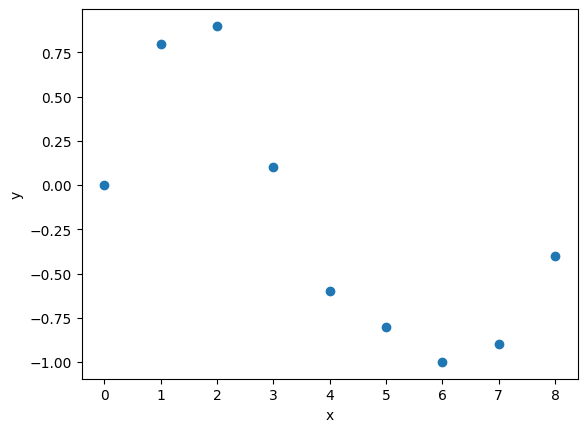

In [82]:
#define a set of test data and plot
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure()
plt.plot(x_d,y_d,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Try performing the polynomial fit using `np.polyval()`

In [83]:
#linear fitting function
y_est = np.polyfit(x_d, y_d, 1)

plot the result

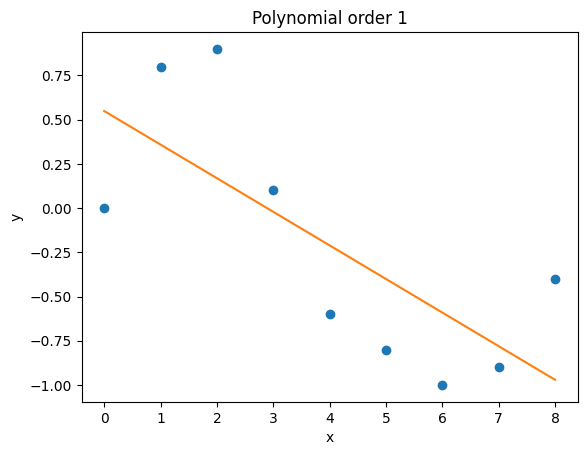

In [84]:
plt.figure()

plt.title(f'Polynomial order 1')

plt.plot(x_d, y_d, 'o')
plt.plot(x_d, np.polyval(y_est, x_d))

plt.xlabel('x')
plt.ylabel('y')

plt.show()

This is not terribly satisfying, so let's try fitting with different powers of a polynomial and examine the results

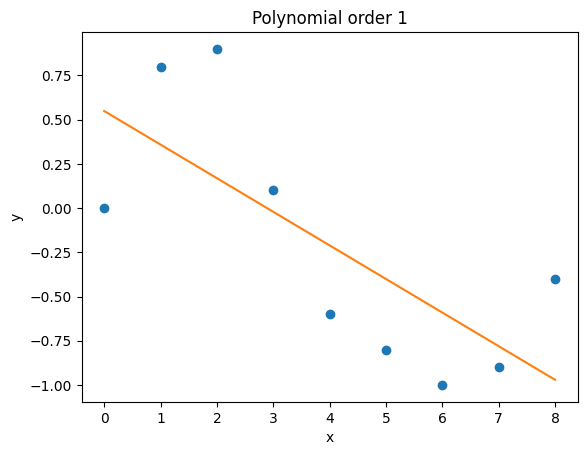

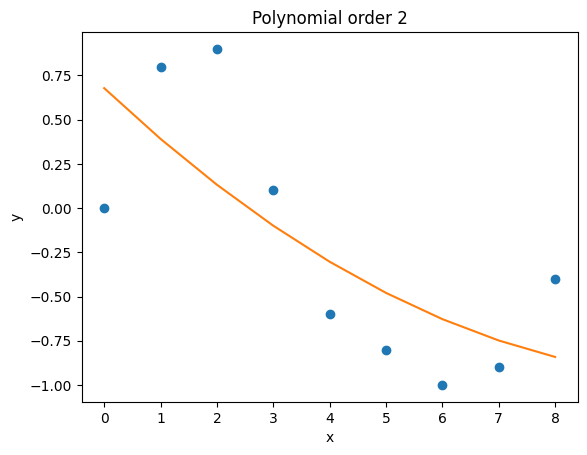

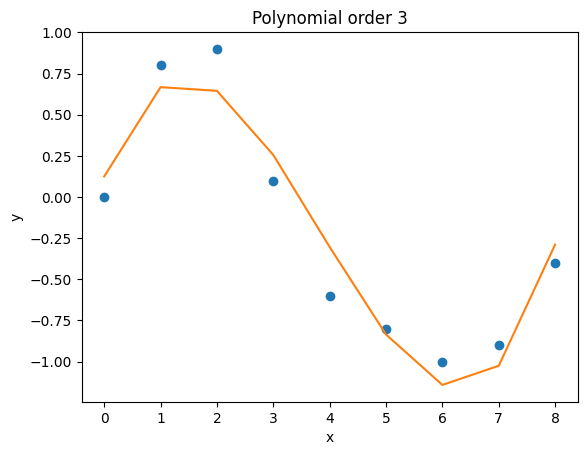

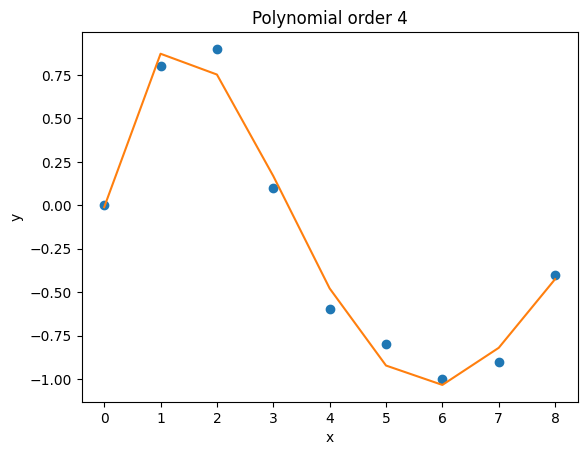

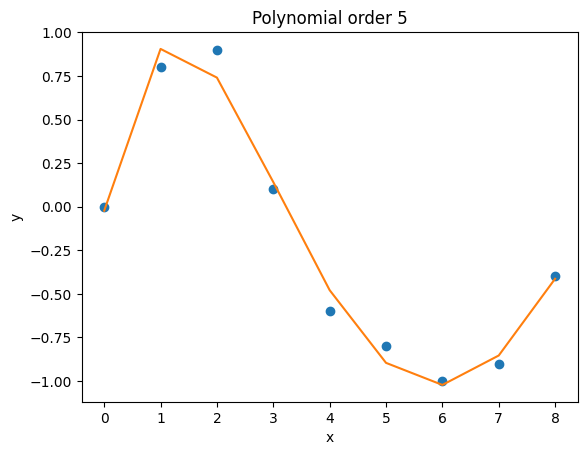

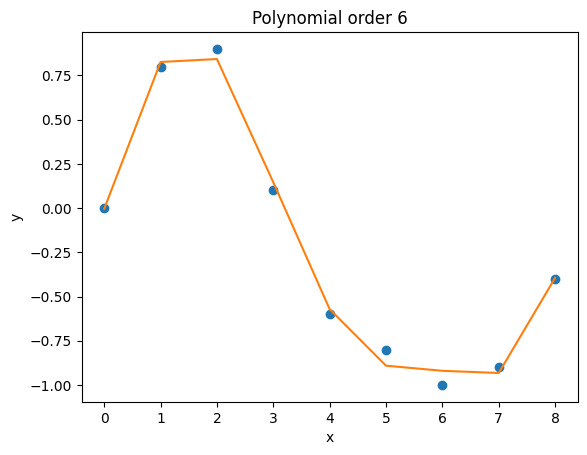

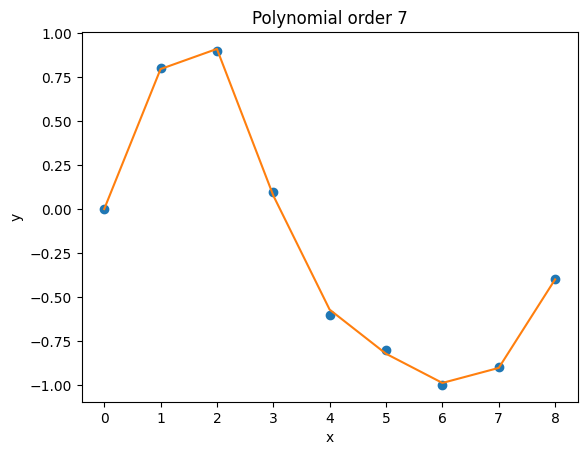

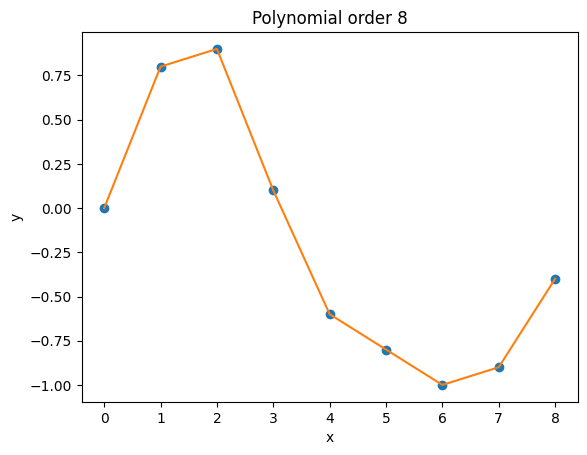

C:\Users\Joseph\AppData\Local\Temp\ipykernel_35376\1495088597.py:8: RankWarning: Polyfit may be poorly conditioned
  y_est = np.polyfit(x_d, y_d, i)


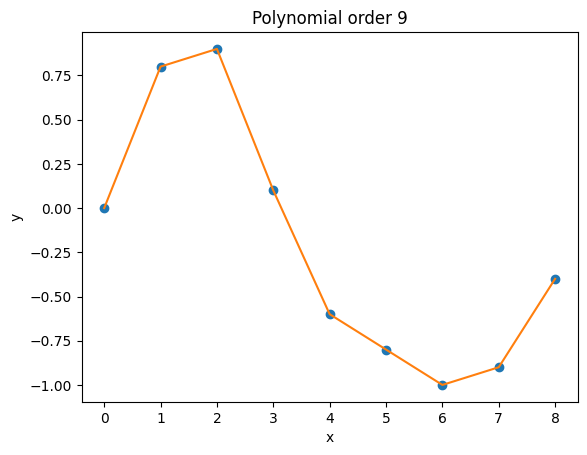

C:\Users\Joseph\AppData\Local\Temp\ipykernel_35376\1495088597.py:8: RankWarning: Polyfit may be poorly conditioned
  y_est = np.polyfit(x_d, y_d, i)


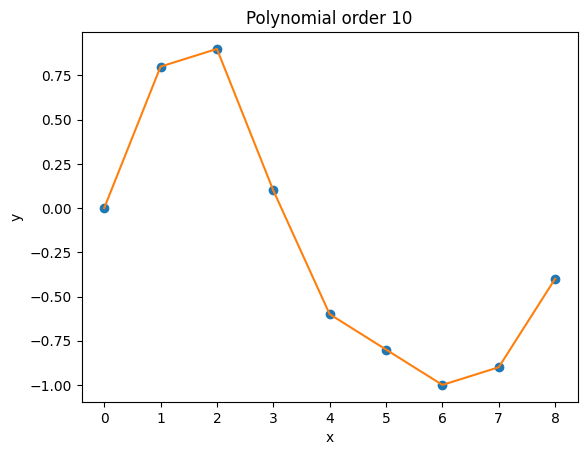

In [85]:

#set maximum degree of polynomial to consider
MaxPolyDeg = 10

# loop through fitting and plot results
for i in range(1, MaxPolyDeg+1):

    #perform polyfit on order 'i'
    y_est = np.polyfit(x_d, y_d, i)

    #plot result
    plt.figure()

    plt.title(f'Polynomial order {i}')
    
    plt.plot(x_d, y_d, 'o')
    plt.plot(x_d, np.polyval(y_est, x_d))

    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()